In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.datasets import make_blobs
import scipy.cluster.hierarchy as shc

In [ ]:
# Create sample dataset
X, _ = make_blobs(n_samples=20, centers=3, random_state=42)
X = pd.DataFrame(X, columns=['Feature1', 'Feature2'])
print("Dataset shape:", X.shape)

Dataset shape: (20, 2)


In [ ]:
# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print("Data preprocessed and scaled")

Data preprocessed and scaled


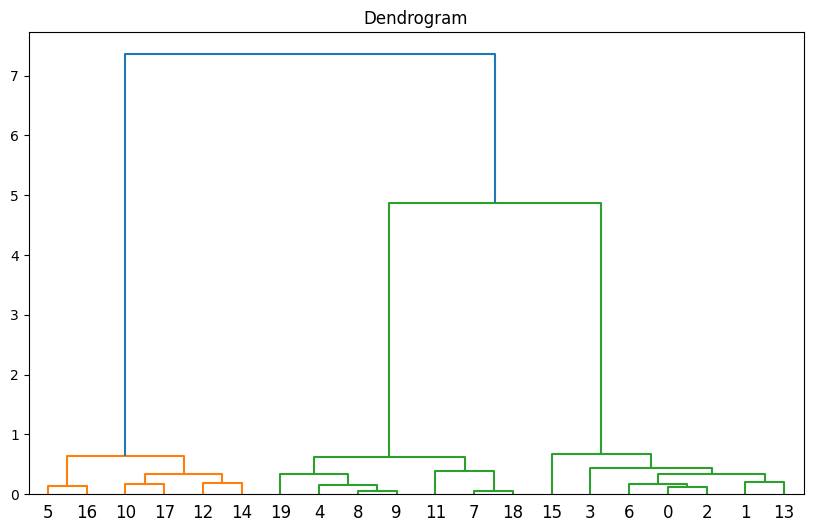

In [ ]:
# Plot dendrogram
plt.figure(figsize=(10, 6))
plt.title('Dendrogram')
shc.dendrogram(shc.linkage(X_scaled, method='ward'))
plt.show()

In [ ]:
# Test k=2 to k=6
k_values = [2, 3, 4, 5, 6]
silhouette_scores = []

for k in k_values:
    model = AgglomerativeClustering(n_clusters=k)
    labels = model.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    silhouette_scores.append(score)
    print(f"k={k}, Silhouette Score: {score:.3f}")

k=2, Silhouette Score: 0.667
k=3, Silhouette Score: 0.839
k=4, Silhouette Score: 0.696
k=5, Silhouette Score: 0.579
k=6, Silhouette Score: 0.439


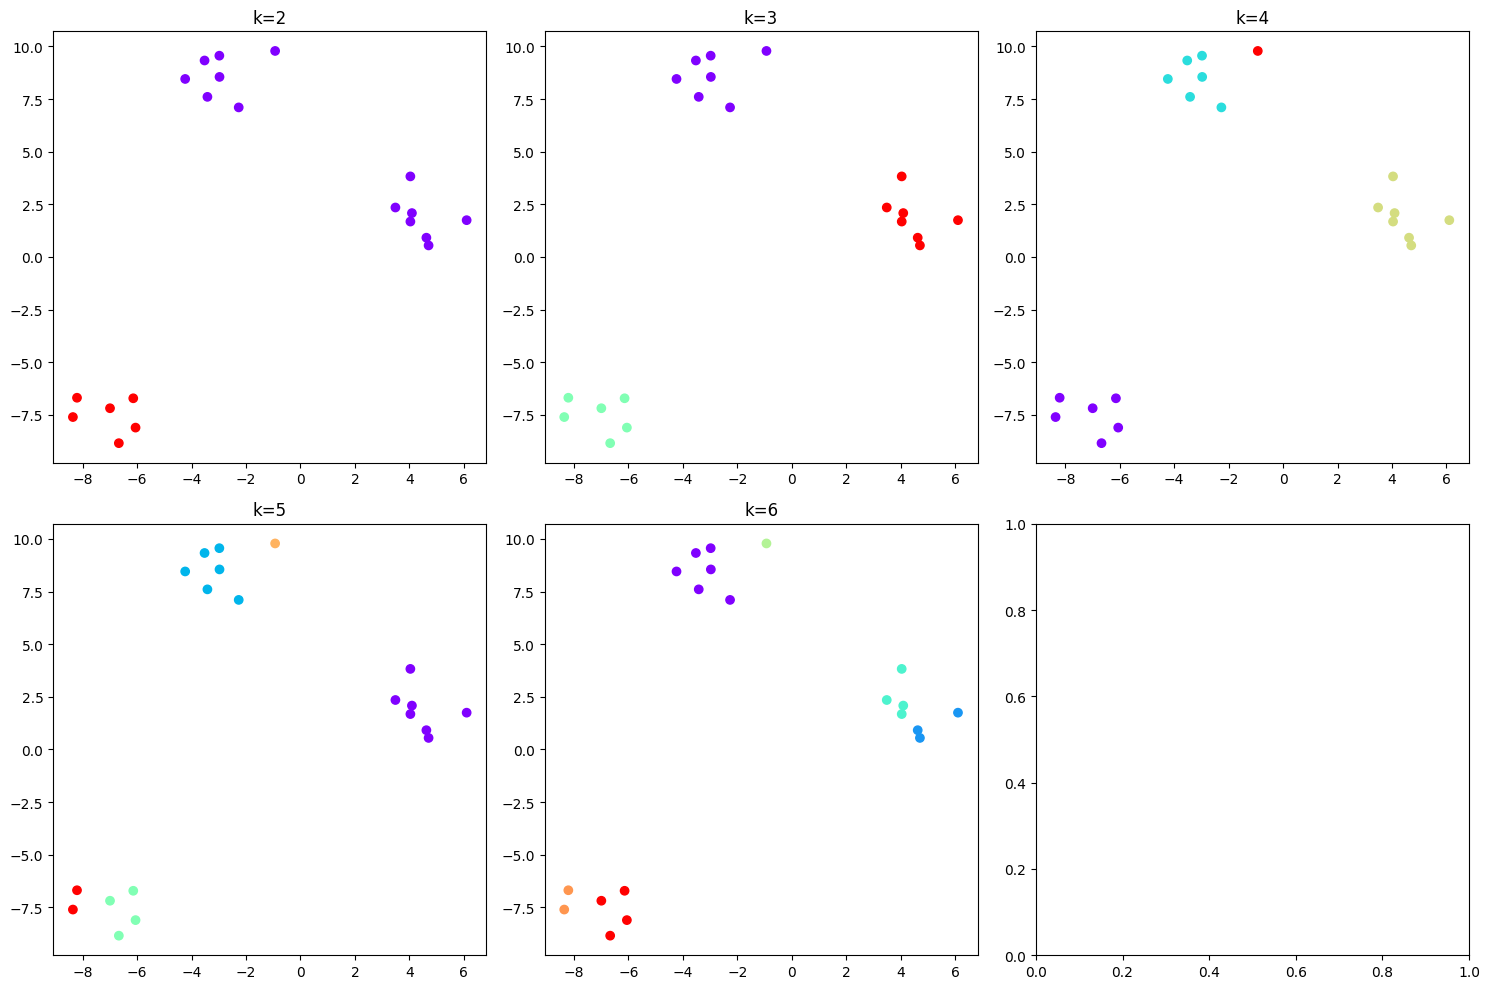

In [ ]:
# Plot clusters for each k
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

for i, k in enumerate(k_values):
    model = AgglomerativeClustering(n_clusters=k)
    labels = model.fit_predict(X_scaled)

    axes[i].scatter(X['Feature1'], X['Feature2'], c=labels, cmap='rainbow')
    axes[i].set_title(f'k={k}')

plt.tight_layout()
plt.show()

Best k: 3
Best Silhouette Score: 0.839


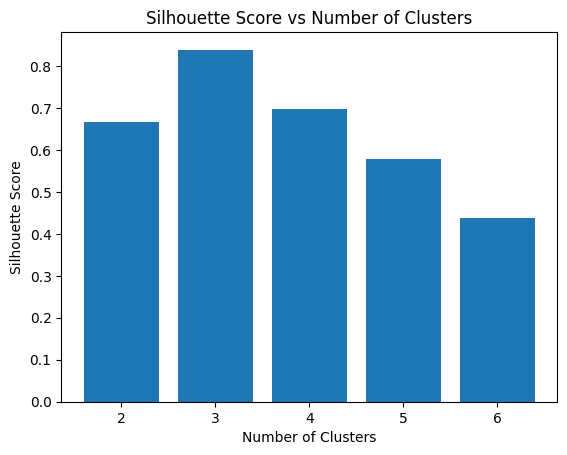

In [ ]:
# Find optimal clusters
best_k = k_values[np.argmax(silhouette_scores)]
best_score = max(silhouette_scores)

print(f"Best k: {best_k}")
print(f"Best Silhouette Score: {best_score:.3f}")

# Plot silhouette scores
plt.bar(k_values, silhouette_scores)
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs Number of Clusters')
plt.show()

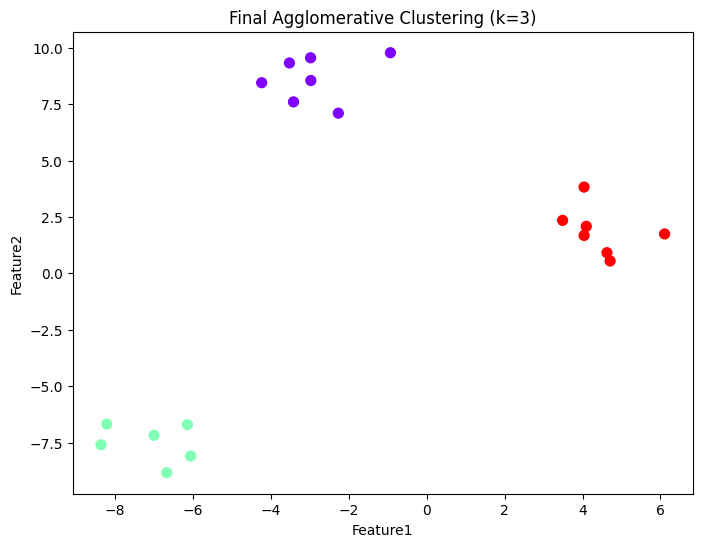

Clustering completed with 3 clusters
Assignment 09 - Complete!


In [ ]:
# Final clustering with best k
final_model = AgglomerativeClustering(n_clusters=best_k)
final_labels = final_model.fit_predict(X_scaled)

plt.figure(figsize=(8, 6))
plt.scatter(X['Feature1'], X['Feature2'], c=final_labels, cmap='rainbow', s=50)
plt.title(f'Final Agglomerative Clustering (k={best_k})')
plt.xlabel('Feature1')
plt.ylabel('Feature2')
plt.show()

print(f"Clustering completed with {best_k} clusters")
print("Assignment 09 - Complete!")